In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

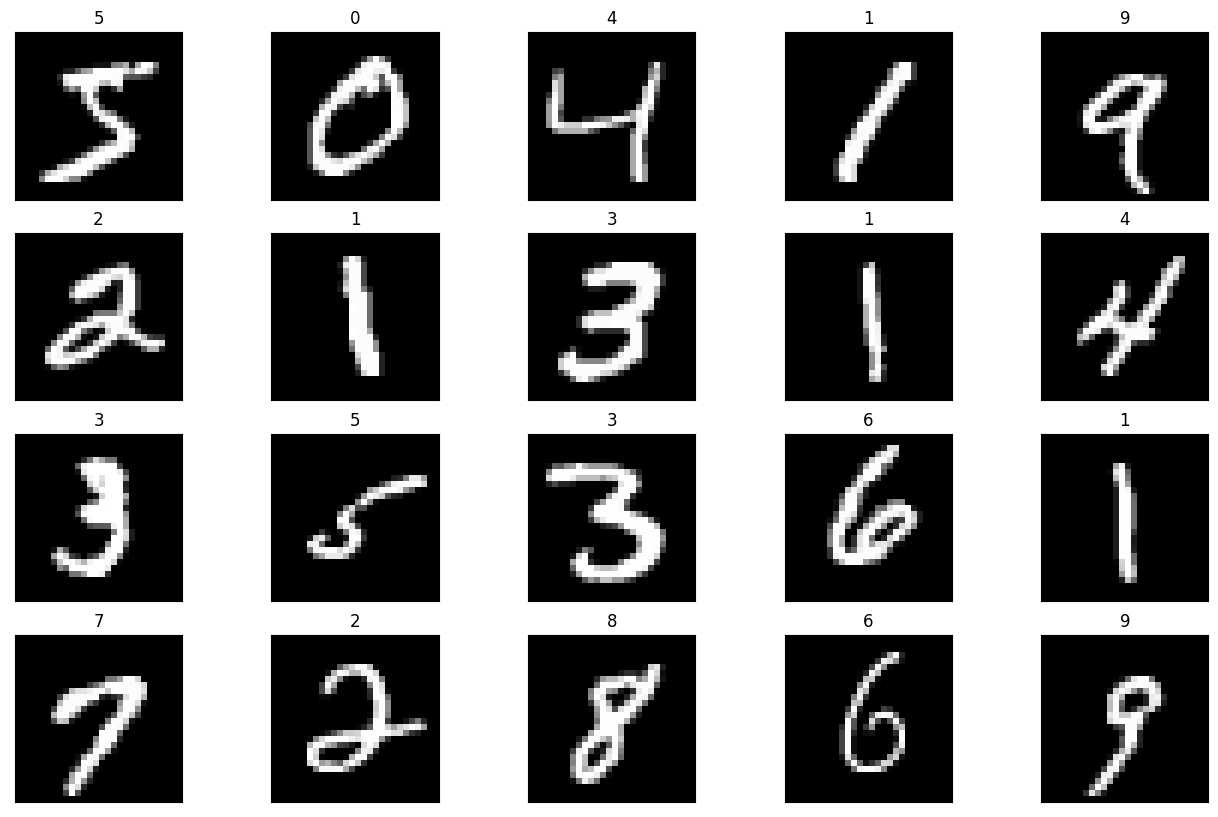

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 11ms/step - loss: 0.6451 - accuracy: 0.8346 - val_loss: 0.3521 - val_accuracy: 0.9058
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3360 - accuracy: 0.9064 - val_loss: 0.2903 - val_accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2876 - accuracy: 0.9195 - val_loss: 0.2628 - val_accuracy: 0.9259
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2575 - accuracy: 0.9279 - val_loss: 0.2370 - val_accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2343 - accuracy: 0.9349 - val_loss: 0.2176 - val_accuracy: 0.9394
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2156 - accuracy: 0.9394 - val_loss: 0.2020 - val_accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2001 - accuracy: 0.9441 - val_loss: 0.1901 - 

In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1595 - accuracy: 0.9553


[0.1594841480255127, 0.955299973487854]

In [10]:
import numpy as np
predicted = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [11]:
predicted_labels = [np.argmax(i) for i in predicted]

In [12]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=predicted_labels)

Text(170.72222222222223, 0.5, 'Actual')

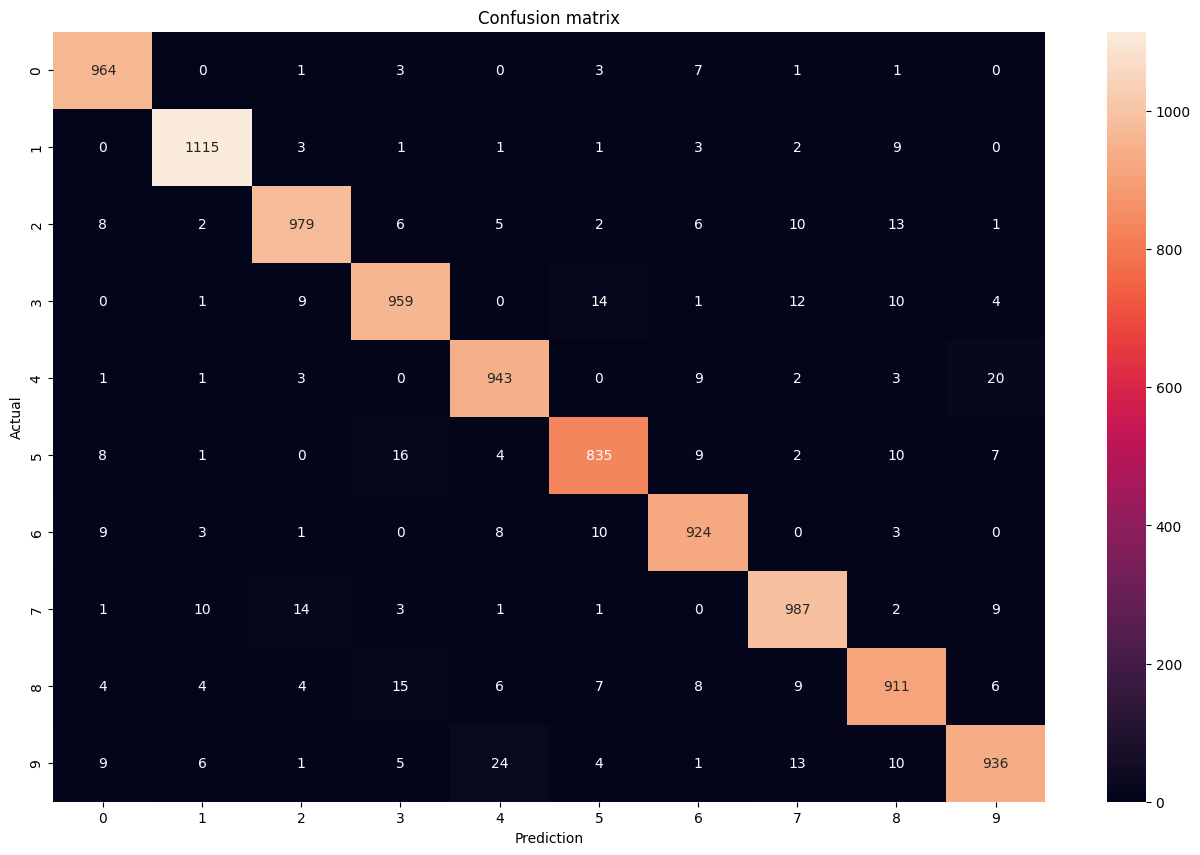

In [13]:
plt.figure(figsize=(16,10))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

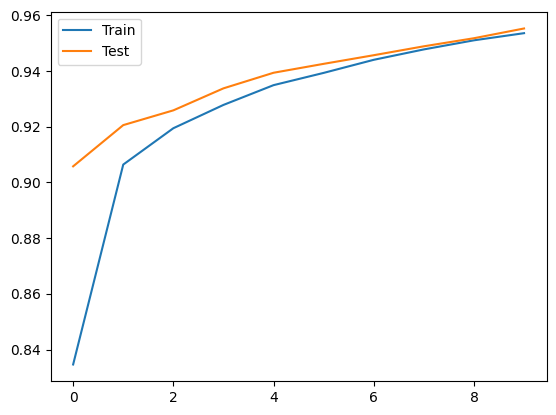

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'])

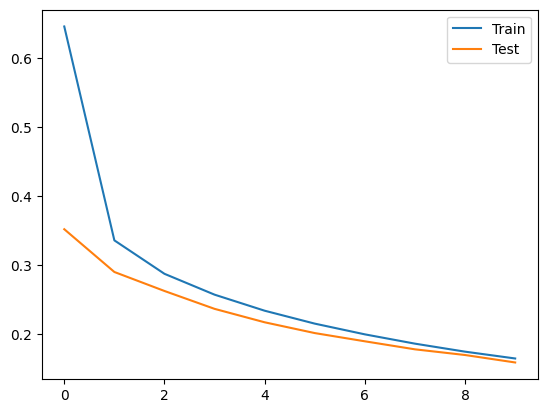

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])